In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
m = 0.6875
c = 1.21

In [33]:
line_from_x = lambda x: m * x + c
line_from_y = lambda y: (y - c)/m 

x = np.arange(0, 10)
y = x
y_l = line_from_x(x)
x_l = line_from_y(y)

In [34]:
X, Y = np.meshgrid(x, y)
Y_left = line_from_x(X)
Y_right = line_from_x(X+1)
X_down = line_from_y(Y)
X_up = line_from_y(Y+1)

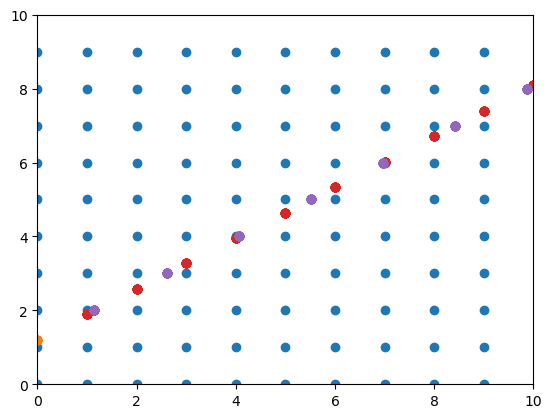

In [35]:
plt.scatter(X, Y)
plt.scatter(X, Y_left)
plt.scatter(X_down, Y)
plt.scatter(X+1, Y_right)
plt.scatter(X_up, Y+1)
plt.xlim([0, 10])
plt.ylim([0, 10]);

In [36]:
Il = np.dstack([np.where(np.logical_and(Y <= Y_left, Y_left < Y+1), X, 0), 
                np.where(np.logical_and(Y <= Y_left, Y_left < Y+1), Y_left, 0)])

In [37]:
Ir = np.dstack([np.where(np.logical_and(Y <= Y_right, Y_right < Y + 1), X+1, 0),
                np.where(np.logical_and(Y <= Y_right, Y_right < Y + 1), Y_right, 0)])

In [38]:
Id = np.dstack([np.where(np.logical_and(X <= X_down, X_down < X + 1), X_down, 0),
                np.where(np.logical_and(X <= X_down, X_down < X + 1), Y, 0)])

In [39]:
Iu = np.dstack([np.where(np.logical_and(X <= X_down, X_down < X + 1), X_up, 0),
                np.where(np.logical_and(X <= X_down, X_down < X + 1), Y+1, 0)])

In [0]:
I = np.abs(np.abs(Il - Ir) - np.abs(Id - Iu))

In [43]:
I

array([[[0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ]],

       [[1.        , 0.6875    ],
        [1.        , 1.8975    ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ]],

       [[0.        , 0.        ],
        [0.54545455, 1.585     ],
        [2.        , 2.585     ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0

In [40]:
magnitude = lambda xy: np.sqrt(xy[0]**2 + xy[1]**2)

A = np.apply_along_axis(magnitude, 2, I)

In [41]:
A

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 1.21353049,  2.14487908,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.6762296 ,  3.26836733,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  2.74821506,  1.21353049,  5.62864104,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  5.08669875,
         6.82636479,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         6.28119272,  8.02883709,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  7.48181611,  1.21353049

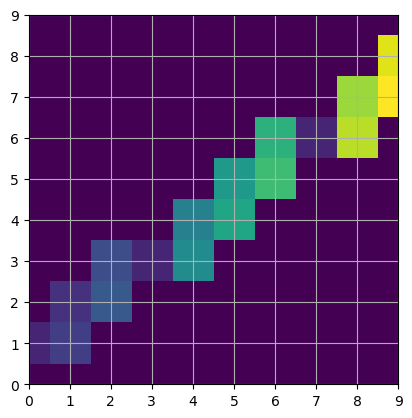

In [42]:
plt.imshow(A, origin='lower')
plt.xlim([0, 9])
plt.ylim([0, 9])
plt.xticks(np.arange(0, 10))
plt.yticks(np.arange(0, 10))
plt.grid(visible=True)